In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def moving_average(arr, window_size):
    if window_size > len(arr):
        raise ValueError("Window size must be less than or equal to the length of the array")
    
    moving_averages = []
    for i in range(len(arr) - window_size + 1):
        window = arr[i:i + window_size]
        window_average = sum(window) / window_size
        moving_averages.append(window_average)
    
    return moving_averages

In [3]:
def create_errorbars(lat_req,fixed_dataavg1,fixed_dataerror1,fixed_dataavg2,fixed_dataerror2,dyn_dataavg,dyn_dataerror):
    cqi_val = [15,14,13,12,11,10]
    lat_requirement = lat_req
    data = {
        "Fixed(7DL,3UL,RR,6) ": fixed_dataavg1,
        "Fixed(6DL,4UL,RR,6) ": fixed_dataavg2,
        "Dynamic":dyn_dataavg
        
    }
    error_data = {
        "Fixed(7DL,3UL,RR,6)": fixed_dataerror1,
        "Fixed(6DL,4UL,RR,6)": fixed_dataerror2,
        "Dynamic": dyn_dataerror
    }
    
    groups = list(data.keys())
    values = np.array(list(data.values()))
    errors = np.array(list(error_data.values()))
    bar_width = 0.3
    index = np.arange(len(cqi_val))
    colors = ['r', 'b','g']
    
    fig, ax = plt.subplots()
    for i, group in enumerate(groups):
        ax.bar(index + i * bar_width, values[i], bar_width, yerr=errors[i], capsize=5, label=group, color=colors[i])
    
    ax.axhline(y=lat_requirement, color='r', linestyle='--', label="Required Latency")
    ax.set_xlabel('CQI Values')
    ax.set_ylabel('Latency (ms)')
    ax.set_title('')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(cqi_val)
    ax.legend()
    
    # Display the graph
    plt.grid()
    plt.show()


In [4]:
def create_timeplots(req_lat1uecqivar,lat1uefixed1,lat1uefixed2,lat1uecqivar,rewards_1uecqivar,path):
    cqi_1uecqivar = [15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 
                     10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0]
    lat1uecqivar = lat1uecqivar
    lat1uefixed1 = lat1uefixed1
    lat1uefixed2 = lat1uefixed2
    req_lat1uecqivar= req_lat1uecqivar
    rewards_1uecqivar = rewards_1uecqivar
    

    # Time data, assuming each point is 100ms apart
    time = [i * 100 for i in range(len(lat1uecqivar))]
    fig, ax1 = plt.subplots(figsize=(8,6))
    font1 = {'family': 'sans-serif', 'size': 25, 'weight': 'heavy'}

    ax1.plot(time, req_lat1uecqivar, color='r', marker='o', linestyle='-', label='Required Latency')
    ax1.plot(time, lat1uecqivar, color='#0066CC', marker='x', linestyle='-', label='DRL Agent')
    ax1.plot(time, lat1uefixed1, color='#380282', marker='^', linestyle='-', label='Fixed(7DL,3UL,RR,6)')
    ax1.plot(time, lat1uefixed2, color='g', marker='v', linestyle='-', label='Fixed(6DL,4UL,RR,6)')
    ax1.set_ylim(5, 50)
    ax1.set_xlabel("Time (ms)", fontdict=font1)
    ax1.set_ylabel("Latency (ms)", color='k', fontdict=font1)
    ax1.tick_params(axis='y', labelcolor='k',labelsize=10)
    ax1.legend(loc='upper left',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})
    ax1.grid()
    
    ax2 = ax1.twinx()
    ax2.plot(time, cqi_1uecqivar[:len(time)], marker='P', color='#B85450', linestyle='-', label='CQI')
    ax2.set_ylabel("CQI", color='#B85450',fontdict=font1)
    ax2.tick_params(axis='y', labelcolor='#B85450',labelsize=10)
    ax2.set_ylim(5, 50)  # Adjust the scale of the secondary y-axis
    ax2.legend(loc='upper right',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})
    
    # plt.title('Latency and CQI over Time')
    plt.setp(ax1.get_xticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
    plt.setp(ax1.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
    plt.setp(ax2.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
    plt.savefig(path, format='pdf', bbox_inches='tight')
    plt.show()


In [5]:
def create_timeplotsstatic(req_lat1uestatic,lat1uefixed1,lat1uefixed2,lat1uestatic,rewards_1uestatic,path):
    cqi_1uestatic = [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 
                     10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
    lat1uestatic = lat1uestatic
    lat1uefixed1 = lat1uefixed1
    lat1uefixed2 = lat1uefixed2
    # lat1uefixed3 = lat1uefixed3
    req_lat1uestatic= req_lat1uestatic
    rewards_1uestatic = rewards_1uestatic
    

    time = [i * 100 for i in range(len(lat1uestatic))]
    fig, ax1 = plt.subplots(figsize=(8, 6))
    # Define font dictionaries with bold weight
    font1 = {'family': 'sans-serif', 'size': 25, 'weight': 'heavy'}
    
    ax1.plot(time, req_lat1uestatic, color='r', marker='o', linestyle='-', label='Required Latency')
    ax1.plot(time, lat1uestatic, color='#0066CC', marker='x', linestyle='-', label='DRL Agent')
    ax1.plot(time, lat1uefixed1, color='#380282', marker='^', linestyle='-', label='Fixed(7DL,3UL,RR,6)')
    ax1.plot(time, lat1uefixed2, color='g', marker='v', linestyle='-', label='Fixed(6DL,4UL,RR,6)')
    ax1.set_ylim(5, 50)
    ax1.set_xlabel("Time (ms)", fontdict=font1)
    ax1.set_ylabel("Latency (ms)", color='k', fontdict=font1)
    ax1.tick_params(axis='y', labelcolor='k',labelsize=10)
    # Apply bold font weight to x and y tick labels
    
    ax1.legend(loc='upper left',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})
    ax1.grid()
    
    ax2 = ax1.twinx()
    ax2.plot(time, cqi_1uestatic[:len(time)], marker='P', color='#B85450', linestyle='-', label='CQI')
    ax2.set_ylabel("CQI", color='#B85450',fontdict=font1)
    ax2.tick_params(axis='y', labelcolor='#B85450',labelsize=10)
    ax2.set_ylim(5, 50)  # Adjust the scale of the secondary y-axis
    ax2.legend(loc='upper right',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})
    
    # plt.title('Latency and CQI over Time',fontdict=font1)
    plt.setp(ax1.get_xticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
    plt.setp(ax1.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
    plt.setp(ax2.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
    plt.savefig(path, format='pdf', bbox_inches='tight')
    # plt.savefig(path, dpi=600, format='png', bbox_inches='tight')
    plt.show()

In [6]:
def calculate_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(data)+1) / len(data)
    return sorted_data, cdf

In [7]:
def createcdfplot(lat1uecqivar,lat1uefixed1,lat1uefixed2,lat_req,path):
    font1 = {'family': 'sans-serif', 'size': 25, 'weight': 'heavy'}
    sorted_lat1uecqivar, cdf_lat1uecqivar = calculate_cdf(lat1uecqivar)
    sorted_lat1uefixed1, cdf_lat1uefixed1 = calculate_cdf(lat1uefixed1)
    sorted_lat1uefixed2, cdf_lat1uefixed2 = calculate_cdf(lat1uefixed2) 
    plt.figure(figsize=(8, 6))
    sns.kdeplot(sorted_lat1uecqivar, cumulative=True, label='DRL Agent', linestyle='--', linewidth = 3,bw_adjust=0.5)
    sns.kdeplot(sorted_lat1uefixed1, cumulative=True, label='Fixed(7DL,3UL,RR,6)', linestyle='--', linewidth = 3,bw_adjust=0.5)
    sns.kdeplot(sorted_lat1uefixed2, cumulative=True, label='Fixed(6DL,4UL,RR,6)', linestyle='--', linewidth = 3,bw_adjust=0.5)
    
    # Add labels, title, and legend
    # plt.title('CDF')
    plt.axvline(x=lat_req, color='red', linestyle='-', linewidth=2, label='Latency Threshold')
    plt.xlabel('Latency (ms)', color='k', fontdict=font1)
    plt.ylabel('CDF', color='k', fontdict=font1)
    plt.legend(loc='upper left',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 12})
    plt.xticks(fontsize=15, fontweight='heavy', fontfamily='sans-serif')
    plt.yticks(fontsize=15, fontweight='heavy', fontfamily='sans-serif')
    
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(path, format='pdf', bbox_inches='tight')
    plt.show()


In [8]:
def rescale_value(x, a, b, c, d):
    return c + ((x - a) * (d - c)) / (b - a)


In [9]:
a, b = 0, 50
# New range
c, req_lat = 0, 24

# Function to rescale a value
def rescale_value(x,req_lat):
    return 0 + ((x - (-75)) * (req_lat - 0)) / (50 - (-75))

# # Rescale all values
# rescaled_values = [rescale_value(x,req_lat) for x in lat1ue]

# # Print the rescaled values
# print(rescaled_values)

In [10]:
def calc_deviation(latencies, lat_req):
        beta1 = 0.02
        beta2 = 0.05
        final_reward = 0
        latencies = latencies[~np.isnan(latencies)]
        deviation = []
        for lat_calc in latencies: 
            if lat_calc <= lat_req:
                reward = 1 / (1 + np.exp(-beta1*(lat_calc-lat_req)))
                reward = reward*100
                final_reward = round(reward)
                deviation.append(final_reward)
            else:
                final_reward = 0
                reward = 1 / (1 + np.exp(-beta2*(lat_calc-lat_req)))
                reward = reward*100
                final_reward = -round(reward)
                deviation.append(final_reward)
        total_rewards = np.sum(deviation)
        scaled_latencies = [rescale_value(x,lat_req) for x in deviation]
        return total_rewards,deviation,scaled_latencies

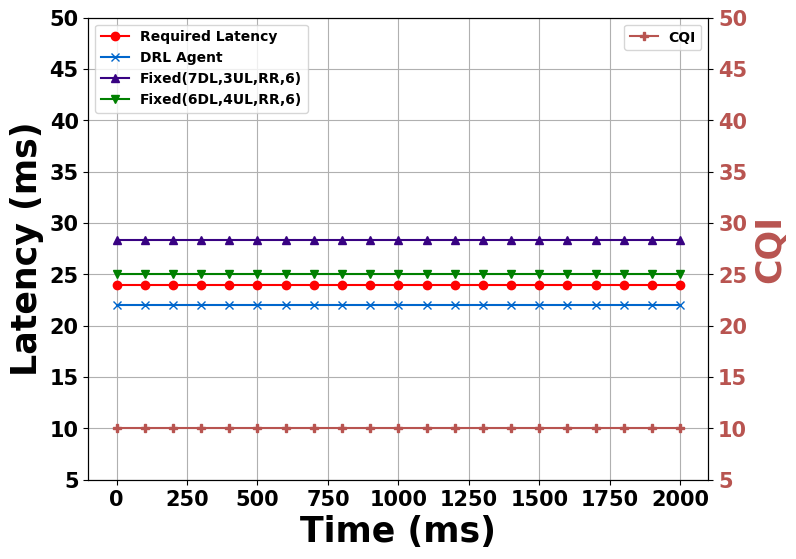

In [11]:
# 1UE static 24ms
lat1uestatic = [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 
                22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]

lat1uefixed1 = [28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 
               28.333333333333332, 28.333333333333332, 28.333333333333332]

lat1uefixed2 = [25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 
                25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]

lat1uefixed3 = [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 
                22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]

req_lat1uestatic= [24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 
                   24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]


rewards_1uestatic = [49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 
                      49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49]

path = "plots/1uestatic_24ms.pdf"
create_timeplotsstatic(req_lat1uestatic[:21],lat1uefixed1[:21],lat1uefixed2[:21],lat1uestatic[:21],rewards_1uestatic[:21],path)

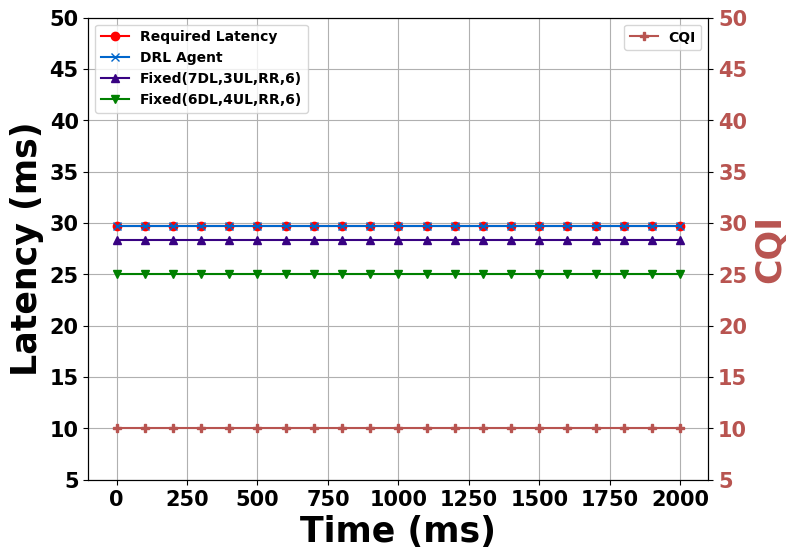

In [12]:
# 1UE static 30ms
lat1uestatic = [29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 
                29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668]

lat1uefixed1 = [28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 
               28.333333333333332, 28.333333333333332]

lat1uefixed2 = [25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 
                25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]

lat1uefixed3 = [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 
                22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]

req_lat1uestatic= [29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 29.666666666666668, 
                   29.666666666666668, 29.666666666666668, 29.666666666666668]


rewards_1uestatic = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 
                     50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
path = "plots/1uestatic_30ms.pdf"
create_timeplotsstatic(req_lat1uestatic[:21],lat1uefixed1[:21],lat1uefixed2[:21],lat1uestatic[:21],rewards_1uestatic[:21],path)

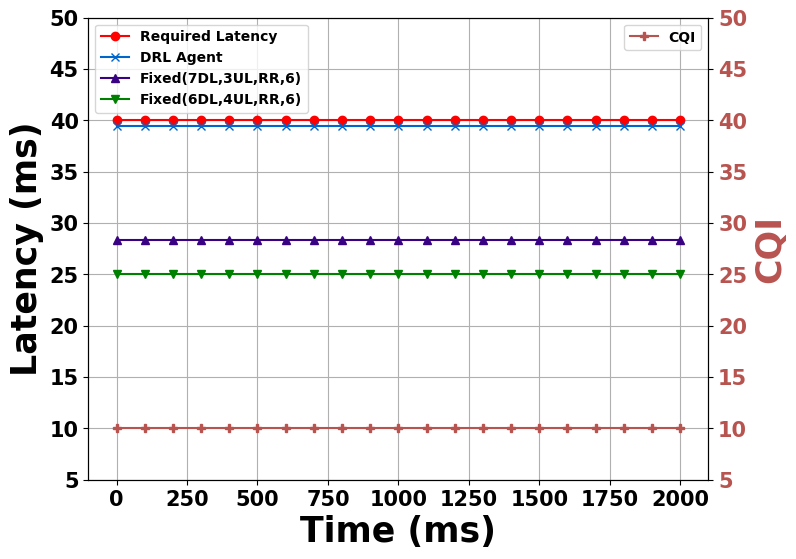

In [13]:
# 1UE static 40ms
lat1uestatic = [39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 
                39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5]

lat1uefixed1 = [28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 28.333333333333332, 
               28.333333333333332, 28.333333333333332]

lat1uefixed2 = [25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 
                25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]

lat1uefixed3 = [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 
                22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]

req_lat1uestatic= [40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 
                   40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]


rewards_1uestatic = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
                     50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
path = "plots/1uestatic_40ms.pdf"
create_timeplotsstatic(req_lat1uestatic[:21],lat1uefixed1[:21],lat1uefixed2[:21],lat1uestatic[:21],rewards_1uestatic[:21],path)

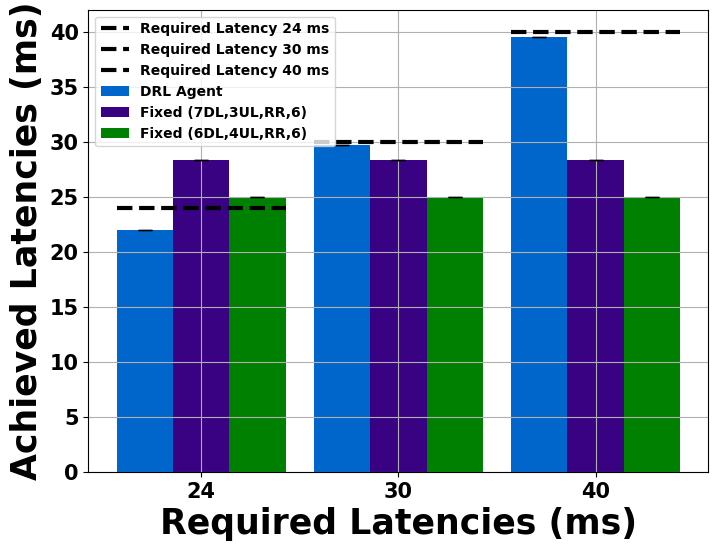

In [14]:
lat_req = [24, 30, 40]
data = {
    "DRL Agent": [22.0, 29.666666666666668, 39.5],
    "Fixed (7DL,3UL,RR,6)": [28.333333333333332, 28.333333333333332, 28.333333333333332],
    "Fixed (6DL,4UL,RR,6)": [25.0, 25.0, 25.0],
    
}
error_data = {
    "DRL Agent": [0, 0, 0],
    "Fixed (7DL,3UL,RR,6)": [0, 0, 0],
    "Fixed (6DL,4UL,RR,6)": [0, 0, 0],
    
}
font1 = {'family': 'sans-serif', 'size': 25, 'weight': 'heavy'}
bar_width = 0.2
spacing = 0.1
colors = ['#0066CC','#380282', 'g']
groups = list(data.keys())
num_groups = len(groups)

index = np.arange(len(lat_req)) * (bar_width * num_groups + spacing)

fig, ax = plt.subplots(figsize=(8, 6))
for i, group in enumerate(groups):
    ax.bar(index + i * bar_width, data[group], bar_width, yerr=error_data[group], capsize=5, label=group, color=colors[i])

# Add horizontal lines at each required latency value
for i, latency in enumerate(lat_req):
    start_x = index[i] - bar_width / 2
    end_x = index[i] + (num_groups - 0.5) * bar_width
    ax.hlines(latency, start_x, end_x, colors='k', linestyles='--', linewidth=3, label=f'Required Latency {latency} ms')

ax.set_xlabel('Required Latencies (ms)', color='k', fontdict=font1)
ax.set_ylabel('Achieved Latencies (ms)', color='k', fontdict=font1)
ax.set_title('')
ax.set_xticks(index + (num_groups - 1) * bar_width / 2)
ax.set_xticklabels(lat_req)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),loc='upper left',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})
plt.grid()
plt.setp(ax.get_xticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
plt.setp(ax.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
path = "plots/1uestatic_req_latencies.pdf"
plt.savefig(path, format='pdf', bbox_inches='tight')
plt.show()


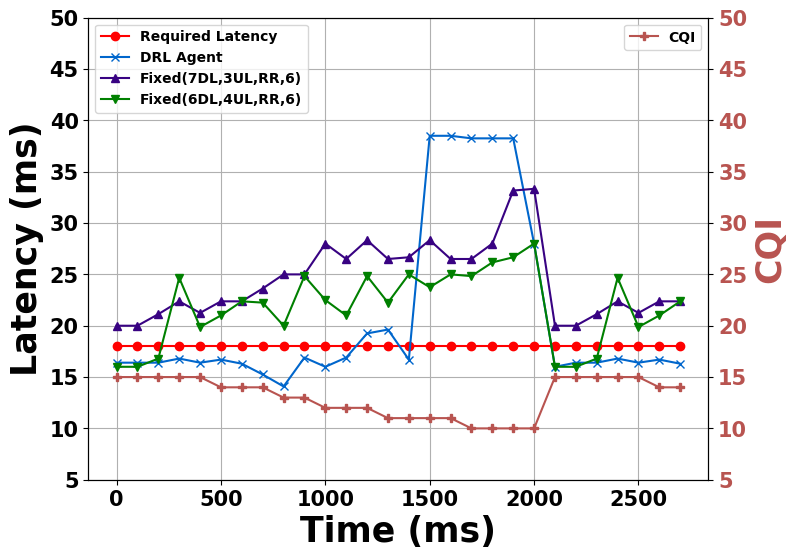

In [15]:
# 1ue 18ms mobile
lat1uecqivar = [16.4, 16.4, 16.4, 16.8, 16.4, 16.7, 16.3, 15.25, 14.083333333333334, 16.9, 16.0, 16.9, 19.25, 19.625, 16.7, 38.5, 38.5, 38.25, 38.25, 38.25, 28.0, 16.0, 16.4, 16.4, 16.8, 16.4, 16.7, 16.3, 15.25, 14.083333333333334, 16.9, 16.0, 16.9, 19.25, 19.625, 16.7, 38.5, 38.5, 38.25, 38.25, 38.25, 28.0, 16.0, 16.4, 
                16.4, 16.8, 16.4]

lat1uefixed1 = [20.0, 20.0, 21.125, 22.375, 21.25, 22.375, 22.375, 23.625, 25.0, 25.0, 28.0, 26.5, 28.333333333333332, 26.5, 26.666666666666668, 28.333333333333332, 26.5, 26.5, 28.0, 33.166666666666664, 33.333333333333336, 20.0, 20.0, 21.125, 22.375, 21.25, 22.375, 22.375, 23.625, 25.0, 25.0, 28.0, 26.5, 28.333333333333332, 26.5, 26.666666666666668, 28.333333333333332, 26.5, 26.5, 28.0, 33.166666666666664, 
               33.333333333333336, 20.0, 20.0, 21.125, 22.375, 21.25]

lat1uefixed2 = [16.0, 16.0, 16.8, 24.666666666666668, 19.875, 21.0, 22.375, 22.25, 20.0, 24.833333333333332, 22.5, 21.0, 24.833333333333332, 22.25, 25.0, 23.75, 25.0, 24.833333333333332, 26.166666666666668, 26.666666666666668, 28.0, 16.0, 16.0, 16.8, 24.666666666666668, 19.875, 21.0, 22.375, 22.25, 20.0, 24.833333333333332, 22.5, 21.0, 24.833333333333332, 22.25, 25.0, 23.75, 25.0, 24.833333333333332, 26.166666666666668, 
                26.666666666666668, 28.0, 16.0, 16.0, 16.8, 24.666666666666668, 19.875]

req_lat1uecqivar= [18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 
                   18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0]


rewards_1uecqivar = [49, 49, 49, 49, 49, 49, 49, 49, 48, 49, 49, 49, 0, 0, 49, 0, 0, 0, 0, 0, 0, 49, 49, 49, 49, 49, 49, 49, 49, 48, 49, 49, 49, 0, 0, 49, 
                     0, 0, 0, 0, 0, 0, 49, 49, 49, 49, 49]
path = "plots/1uemobile_18ms.pdf"
create_timeplots(req_lat1uecqivar[:28],lat1uefixed1[:28],lat1uefixed2[:28],lat1uecqivar[:28],rewards_1uecqivar[:28],path)

In [16]:
total_rewards,deviation,lat1uecqivar_scaled = calc_deviation(np.array(lat1uecqivar), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uecqivar_scaled

In [17]:
total_rewards,deviation,lat1uefixed1_scaled = calc_deviation(np.array(lat1uefixed1), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed1_scaled

In [18]:
total_rewards,deviation,lat1uefixed2_scaled = calc_deviation(np.array(lat1uefixed2), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed2_scaled

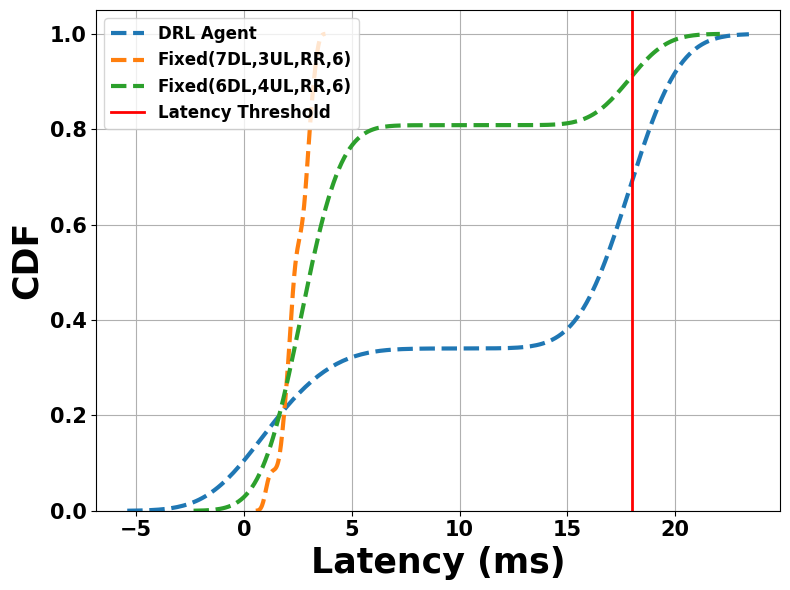

In [19]:
path = "plots/1uemobile_18ms_cdf.pdf"
createcdfplot(lat1uecqivar_scaled,lat1uefixed1_scaled,lat1uefixed2_scaled,18,path)

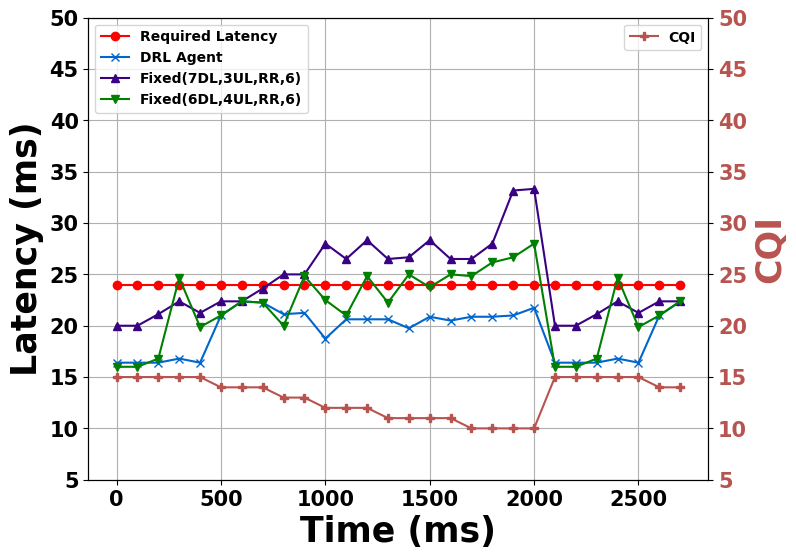

In [20]:
# 24ms 1ue mobile
lat1uecqivar = [16.4, 16.4, 16.4, 16.8, 16.4, 21.0, 22.375, 22.25, 21.125, 21.25, 18.75, 20.625, 20.625, 20.625, 19.75, 20.875, 20.5, 20.875, 20.875, 21.0, 21.75, 16.4, 16.4, 16.4, 16.8, 16.4, 21.0, 22.375, 22.25, 21.125, 21.25, 18.75, 20.625, 20.625, 
                20.625, 19.75, 20.875, 20.5, 20.875, 20.875, 21.0, 21.75, 16.4, 16.4, 16.4, 16.8, 16.4]

lat1uefixed1 = [20.0, 20.0, 21.125, 22.375, 21.25, 22.375, 22.375, 23.625, 25.0, 25.0, 28.0, 26.5, 28.333333333333332, 26.5, 26.666666666666668, 28.333333333333332, 26.5, 26.5, 28.0, 33.166666666666664, 33.333333333333336, 20.0, 20.0, 21.125, 22.375, 21.25, 22.375, 22.375, 23.625, 25.0, 25.0, 28.0, 26.5, 28.333333333333332, 26.5, 26.666666666666668, 28.333333333333332, 26.5, 26.5, 28.0, 
               33.166666666666664, 33.333333333333336, 20.0, 20.0, 21.125, 22.375, 21.25]

lat1uefixed2 = [16.0, 16.0, 16.8, 24.666666666666668, 19.875, 21.0, 22.375, 22.25, 20.0, 24.833333333333332, 22.5, 21.0, 24.833333333333332, 22.25, 25.0, 23.75, 25.0, 24.833333333333332, 26.166666666666668, 26.666666666666668, 28.0, 16.0, 16.0, 16.8, 24.666666666666668, 19.875, 21.0, 22.375, 22.25, 20.0, 24.833333333333332, 22.5, 21.0, 24.833333333333332, 22.25, 25.0, 23.75, 25.0, 24.833333333333332, 26.166666666666668, 26.666666666666668, 
                28.0, 16.0, 16.0, 16.8, 24.666666666666668, 19.875]

req_lat1uecqivar= [24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 
                   24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]


rewards_1uecqivar = [46, 46, 46, 46, 46, 49, 49, 49, 49, 49, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 46, 46, 46, 46, 46, 49, 49, 49, 49, 49, 47, 48, 48, 
                     48, 48, 48, 48, 48, 48, 49, 49, 46, 46, 46, 46, 46]

path = "plots/1uemobile_24ms.pdf"
create_timeplots(req_lat1uecqivar[:28],lat1uefixed1[:28],lat1uefixed2[:28],lat1uecqivar[:28],rewards_1uecqivar[:28],path)

In [21]:
total_rewards,deviation,lat1uecqivar_scaled = calc_deviation(np.array(lat1uecqivar), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uecqivar_scaled

In [22]:
total_rewards,deviation,lat1uefixed1_scaled = calc_deviation(np.array(lat1uefixed1), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed1_scaled

In [23]:
total_rewards,deviation,lat1uefixed2_scaled = calc_deviation(np.array(lat1uefixed2), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed2_scaled

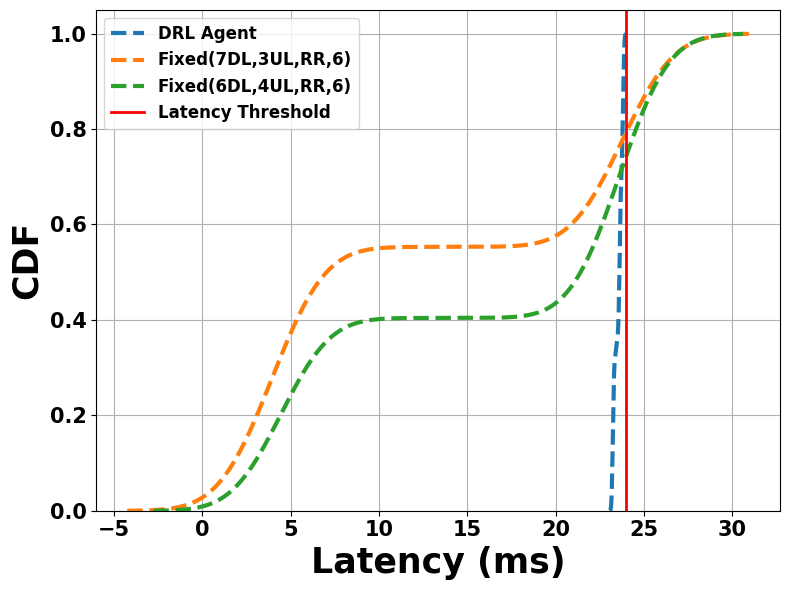

In [24]:
path = "plots/1uemobile_24ms_cdf.pdf"
createcdfplot(lat1uecqivar_scaled,lat1uefixed1_scaled,lat1uefixed2_scaled,24,path)

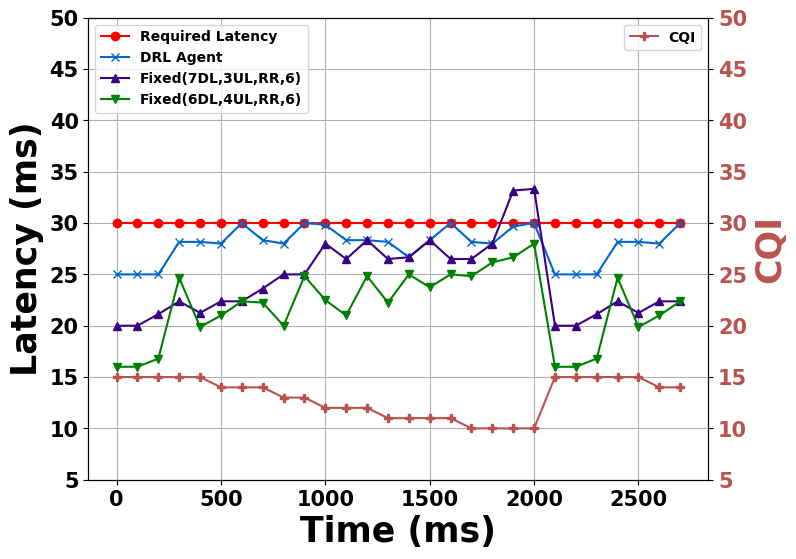

In [25]:
# 30ms 1ue mobile
lat1uecqivar = [25.0, 25.0, 25.0, 28.166666666666668, 28.166666666666668, 28.0, 30.0, 28.333333333333332, 28.0, 30.0, 29.833333333333332, 28.333333333333332, 28.333333333333332, 28.166666666666668, 26.666666666666668, 28.333333333333332, 30.0, 28.166666666666668, 28.0, 29.666666666666668, 30.0, 25.0, 25.0, 25.0, 28.166666666666668, 28.166666666666668, 28.0, 30.0, 28.333333333333332, 28.0, 30.0, 29.833333333333332, 28.333333333333332, 28.333333333333332, 28.166666666666668, 26.666666666666668, 28.333333333333332, 30.0, 28.166666666666668, 28.0, 29.666666666666668, 
                30.0, 25.0, 25.0, 25.0, 28.166666666666668, 28.166666666666668]

lat1uefixed1 = [20.0, 20.0, 21.125, 22.375, 21.25, 22.375, 22.375, 23.625, 25.0, 25.0, 28.0, 26.5, 28.333333333333332, 26.5, 26.666666666666668, 28.333333333333332, 26.5, 26.5, 28.0, 33.166666666666664, 33.333333333333336, 20.0, 20.0, 21.125, 22.375, 21.25, 22.375, 22.375, 23.625, 25.0, 25.0, 28.0, 26.5, 28.333333333333332, 26.5, 26.666666666666668, 28.333333333333332, 26.5, 26.5, 28.0, 33.166666666666664, 
               33.333333333333336, 20.0, 20.0, 21.125, 22.375, 21.25]

lat1uefixed2 = [16.0, 16.0, 16.8, 24.666666666666668, 19.875, 21.0, 22.375, 22.25, 20.0, 24.833333333333332, 22.5, 21.0, 24.833333333333332, 22.25, 25.0, 23.75, 25.0, 24.833333333333332, 26.166666666666668, 26.666666666666668, 28.0, 16.0, 16.0, 16.8, 24.666666666666668, 19.875, 21.0, 22.375, 22.25, 20.0, 24.833333333333332, 22.5, 21.0, 24.833333333333332, 22.25, 25.0, 23.75, 25.0, 24.833333333333332, 26.166666666666668,
                26.666666666666668, 28.0, 16.0, 16.0, 16.8, 24.666666666666668, 19.875]

req_lat1uecqivar= [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 
                   30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]


rewards_1uecqivar = [48, 48, 48, 49, 49, 49, 50, 49, 49, 50, 50, 49, 49, 49, 48, 49, 50, 49, 49, 50, 50, 48, 48, 48, 49, 49, 49, 50, 49, 49, 
                     50, 50, 49, 49, 49, 48, 49, 50, 49, 49, 50, 50, 48, 48, 48, 49, 49]

path = "plots/1uemobile_30ms.pdf"
create_timeplots(req_lat1uecqivar[:28],lat1uefixed1[:28],lat1uefixed2[:28],lat1uecqivar[:28],rewards_1uecqivar[:28],path)

In [26]:
total_rewards,deviation,lat1uecqivar_scaled = calc_deviation(np.array(lat1uecqivar), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uecqivar_scaled

In [27]:
total_rewards,deviation,lat1uefixed1_scaled = calc_deviation(np.array(lat1uefixed1), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed1_scaled

In [28]:
total_rewards,deviation,lat1uefixed2_scaled = calc_deviation(np.array(lat1uefixed2), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed2_scaled

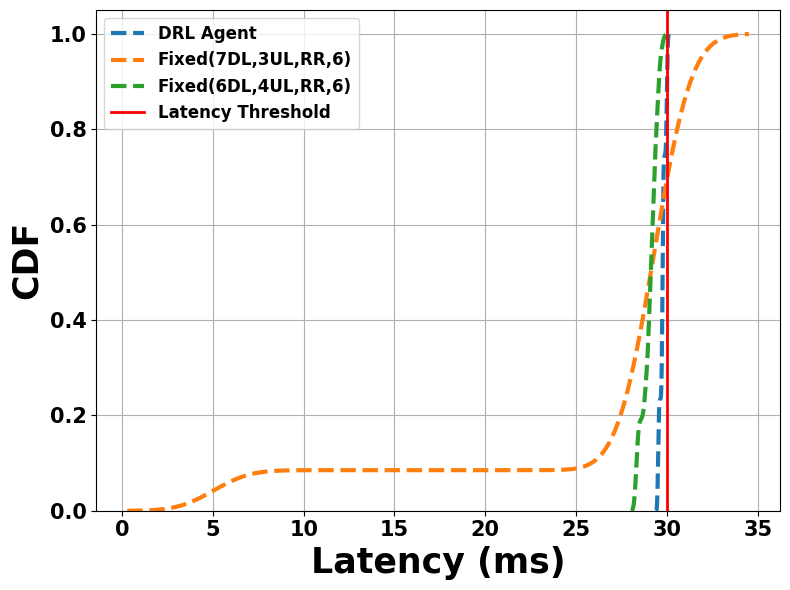

In [29]:
path = "plots/1uemobile_30ms_cdf.pdf"
createcdfplot(lat1uecqivar_scaled,lat1uefixed1_scaled,lat1uefixed2_scaled,30,path)

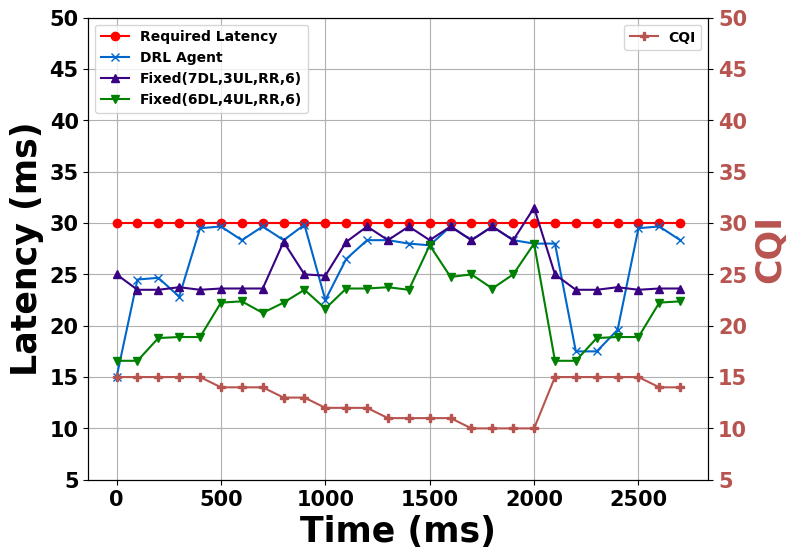

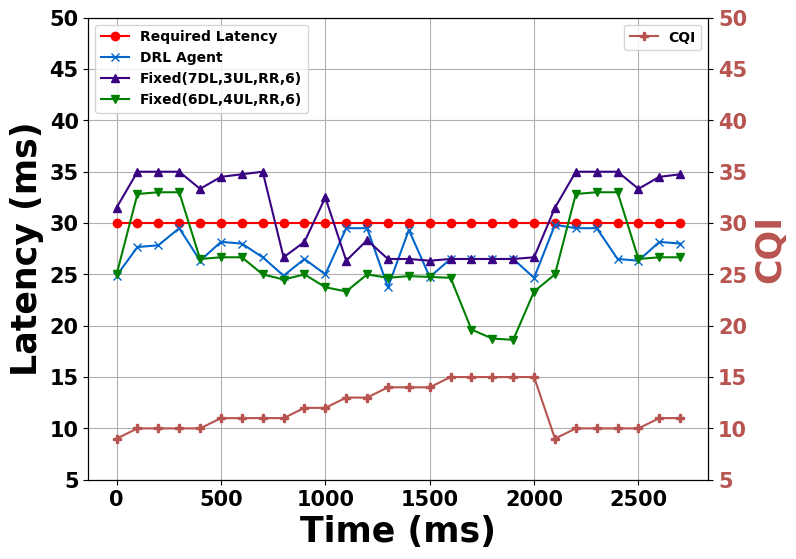

In [30]:
# 30ms (mobile 2ue)
lat1uecqivar1 = [15.0, 24.5, 24.666666666666668, 22.833333333333332, 29.5, 29.666666666666668, 28.333333333333332, 29.666666666666668, 28.333333333333332, 29.833333333333332, 22.5, 26.5, 28.333333333333332, 28.333333333333332, 28.0, 27.833333333333332, 29.666666666666668, 28.333333333333332, 29.666666666666668, 28.333333333333332, 28.0, 28.0, 17.5, 17.5, 19.6, 29.5, 29.666666666666668, 28.333333333333332, 29.666666666666668, 28.333333333333332, 29.833333333333332, 22.5, 26.5, 28.333333333333332, 28.333333333333332, 28.0, 27.833333333333332, 
                29.666666666666668, 28.333333333333332, 29.666666666666668, 28.333333333333332, 28.0, 28.0, 17.5, 17.5, 19.6, 29.5]

lat1uecqivar2 = [24.875, 27.666666666666668, 27.833333333333332, 29.5, 26.333333333333332, 28.166666666666668, 28.0, 26.666666666666668, 24.875, 26.5, 25.0, 29.5, 29.5, 23.75, 29.333333333333332, 24.75, 26.5, 26.5, 26.5, 26.5, 24.666666666666668, 29.833333333333332, 29.5, 29.5, 26.5, 26.333333333333332, 28.166666666666668, 28.0, 26.666666666666668, 24.875, 26.5, 25.0, 29.5, 29.5, 23.75, 29.333333333333332,24.75, 26.5, 26.5, 26.5, 26.5, 24.666666666666668, 29.833333333333332, 29.5, 29.5, 26.5, 26.333333333333332]


lat1uefixed1 = [25.0, 23.5, 23.5, 23.75, 23.5, 23.625, 23.625, 23.625, 28.166666666666668, 25.0, 24.875, 28.166666666666668, 29.666666666666668, 28.333333333333332, 29.666666666666668, 28.333333333333332, 29.666666666666668, 28.333333333333332, 29.666666666666668, 28.333333333333332, 31.5, 25.0, 23.5, 23.5, 23.75, 23.5, 23.625, 23.625, 23.625, 28.166666666666668, 25.0, 24.875, 28.166666666666668, 29.666666666666668, 28.333333333333332, 29.666666666666668, 28.333333333333332, 29.666666666666668, 28.333333333333332, 29.666666666666668, 
               28.333333333333332, 31.5, 25.0, 23.5, 23.5, 23.75, 23.5]

lat1uefixed11 = [16.583333333333332, 16.583333333333332, 18.8, 18.9, 18.9, 22.25, 22.375, 21.25, 22.25, 23.5, 21.666666666666668, 23.625, 23.625, 23.75, 23.5, 27.833333333333332, 24.75, 25.0, 23.625, 25.0, 28.0, 16.583333333333332, 16.583333333333332, 18.8, 18.9, 18.9, 22.25, 22.375, 21.25, 22.25, 23.5, 21.666666666666668, 23.625, 23.625, 23.75, 23.5, 27.833333333333332, 24.75, 25.0, 
                 23.625, 25.0, 28.0, 16.583333333333332, 16.583333333333332, 18.8, 18.9, 18.9]

lat1uefixed2 = [31.5, 35.0, 35.0, 35.0, 33.333333333333336, 34.5, 34.75, 35.0, 26.666666666666668, 28.166666666666668, 32.5, 26.333333333333332, 28.333333333333332, 26.5, 26.5, 26.333333333333332, 26.5, 26.5, 26.5, 26.5, 26.666666666666668, 31.5, 35.0, 35.0, 35.0, 33.333333333333336, 34.5, 34.75, 35.0, 26.666666666666668, 28.166666666666668, 32.5, 26.333333333333332, 28.333333333333332, 26.5, 26.5, 26.333333333333332, 26.5, 26.5, 26.5, 26.5, 
                26.666666666666668, 31.5, 35.0, 35.0, 35.0, 33.333333333333336]

lat1uefixed22 = [25.0, 32.833333333333336, 33.0, 33.0, 26.5, 26.666666666666668, 26.666666666666668, 25.0, 24.5, 25.0, 23.75, 23.333333333333332, 25.0, 24.666666666666668, 24.833333333333332, 24.75, 24.666666666666668, 19.625, 18.75, 18.625, 23.333333333333332, 25.0, 32.833333333333336, 33.0, 33.0, 26.5, 26.666666666666668, 26.666666666666668, 25.0, 24.5, 25.0, 23.75, 23.333333333333332, 25.0, 24.666666666666668, 24.833333333333332, 24.75, 24.666666666666668, 19.625, 18.75, 18.625, 
                 23.333333333333332, 25.0, 32.833333333333336, 33.0, 33.0, 26.5]

req_lat1uecqivar= [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 
                   30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]


rewards_1uecqivar = [90, 96, 96, 96, 98, 99, 98, 98, 96, 98, 94, 98, 99, 96, 99, 96, 98, 97, 98, 97, 96, 99, 94, 94, 93, 98, 99, 98, 98, 96, 98, 
                     94, 98, 99, 96, 99, 96, 98, 97, 98, 97, 96, 99, 94, 94, 93, 98]


cqi_1uecqivar1 = [15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 12.0, 12.0, 12.0,11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0]

cqi_1uecqivar2 = [9.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 13.0, 13.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 9.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 13.0, 13.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 9.0, 10.0, 10.0, 10.0, 10.0]
# Time data, assuming each point is 100ms apart
time = [i * 100 for i in range(len(lat1uecqivar1[:28]))]


fig, ax1 = plt.subplots(figsize=(8, 6))
font1 = {'family': 'sans-serif', 'size': 25, 'weight': 'heavy'}

ax1.plot(time, req_lat1uecqivar[:28], color='r', marker='o', linestyle='-', label='Required Latency')
ax1.plot(time, lat1uecqivar1[:28], color='#0066CC', marker='x', linestyle='-', label='DRL Agent')
ax1.plot(time, lat1uefixed1[:28], color='#380282', marker='^', linestyle='-', label='Fixed(7DL,3UL,RR,6)')
ax1.plot(time, lat1uefixed11[:28], color='g', marker='v', linestyle='-', label='Fixed(6DL,4UL,RR,6)')
ax1.set_ylim(5, 50)
ax1.set_xlabel("Time (ms)", fontdict=font1)
ax1.set_ylabel("Latency (ms)", color='k', fontdict=font1)
ax1.tick_params(axis='y', labelcolor='k',labelsize=10)
ax1.legend(loc='upper left',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(time, cqi_1uecqivar1[:len(time)], marker='P', color='#B85450', linestyle='-', label='CQI')
ax2.set_ylabel("CQI", color='#B85450',fontdict=font1)
ax2.tick_params(axis='y', labelcolor='#B85450',labelsize=10)
ax2.set_ylim(5, 50)  # Adjust the scale of the secondary y-axis
ax2.legend(loc='upper right',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})

# plt.title('Latency and CQI over Time')
plt.setp(ax1.get_xticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
plt.setp(ax1.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
plt.setp(ax2.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
path = "plots/2uemobileue1_30ms.pdf"
plt.savefig(path, format='pdf', bbox_inches='tight')
plt.show()




fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(time, req_lat1uecqivar[:28], color='r', marker='o', linestyle='-', label='Required Latency')
ax1.plot(time, lat1uecqivar2[:28], color='#0066CC', marker='x', linestyle='-', label='DRL Agent')
ax1.plot(time, lat1uefixed2[:28], color='#380282', marker='^', linestyle='-', label='Fixed(7DL,3UL,RR,6)')
ax1.plot(time, lat1uefixed22[:28], color='g', marker='v', linestyle='-', label='Fixed(6DL,4UL,RR,6)')
ax1.set_ylim(5, 50)
ax1.set_xlabel("Time (ms)", fontdict=font1)
ax1.set_ylabel("Latency (ms)", color='k', fontdict=font1)
ax1.tick_params(axis='y', labelcolor='k',labelsize=10)
ax1.legend(loc='upper left',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(time, cqi_1uecqivar2[:len(time)], marker='P', color='#B85450', linestyle='-', label='CQI')
ax2.set_ylabel("CQI", color='#B85450',fontdict=font1)
ax2.tick_params(axis='y', labelcolor='#B85450',labelsize=10)
ax2.set_ylim(5, 50)  # Adjust the scale of the secondary y-axis
ax2.legend(loc='upper right',prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})

# plt.title('Latency and CQI over Time')
plt.setp(ax1.get_xticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
plt.setp(ax1.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
plt.setp(ax2.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif',fontsize=15)
path = "plots/2uemobileue2_30ms.pdf"
plt.savefig(path, format='pdf', bbox_inches='tight')
plt.show()


In [31]:
total_rewards,deviation,lat1uecqivar1_scaled = calc_deviation(np.array(lat1uecqivar1), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uecqivar_scaled

In [32]:
total_rewards,deviation,lat1uefixed1_scaled = calc_deviation(np.array(lat1uefixed1), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed1_scaled

In [33]:
total_rewards,deviation,lat1uefixed11_scaled = calc_deviation(np.array(lat1uefixed11), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed2_scaled

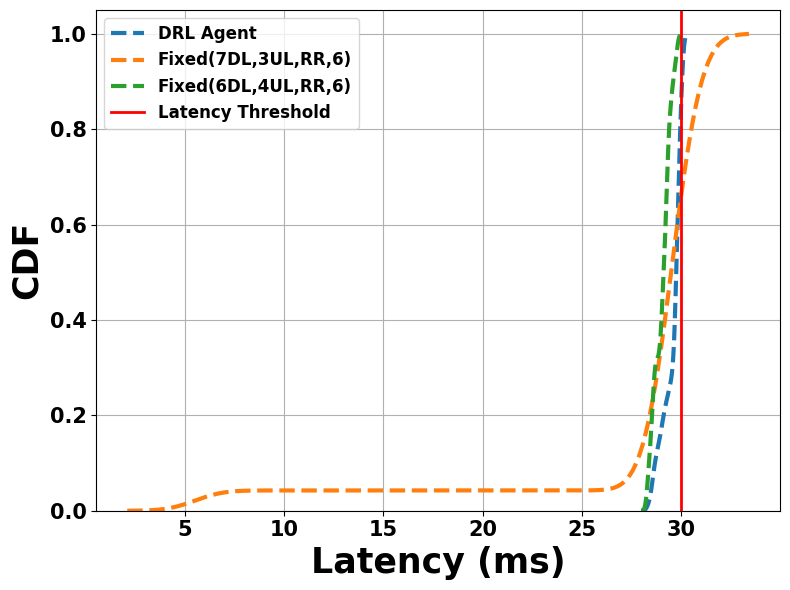

In [34]:
path = "plots/2uemobileue1_30ms_cdf.pdf"
createcdfplot(lat1uecqivar1_scaled,lat1uefixed1_scaled,lat1uefixed11_scaled,30,path)

In [35]:
total_rewards,deviation,lat1uecqivar2_scaled = calc_deviation(np.array(lat1uecqivar2), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uecqivar_scaled

In [36]:
total_rewards,deviation,lat1uefixed2_scaled = calc_deviation(np.array(lat1uefixed2), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed1_scaled

In [37]:
total_rewards,deviation,lat1uefixed22_scaled = calc_deviation(np.array(lat1uefixed22), req_lat1uecqivar[0])
# total_rewards,deviation,lat1uefixed2_scaled

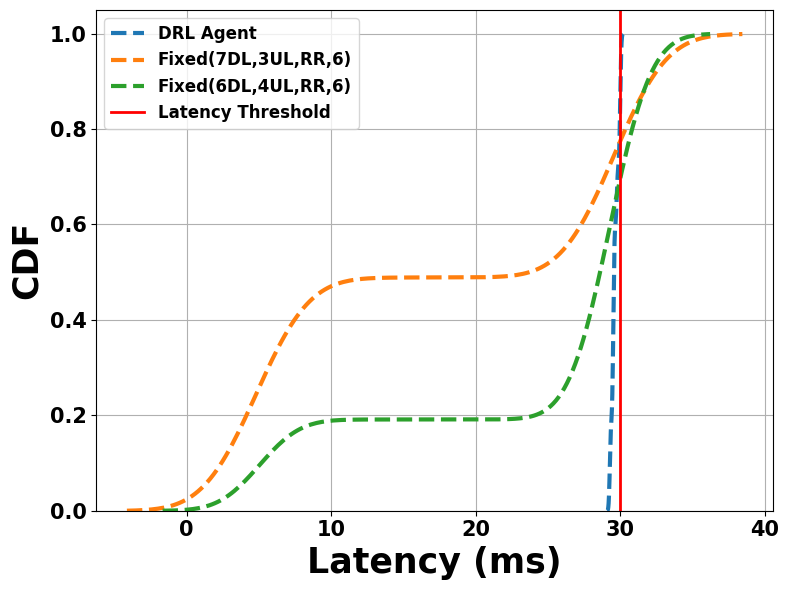

In [38]:
path = "plots/2uemobileue2_30ms_cdf.pdf"
createcdfplot(lat1uecqivar2_scaled,lat1uefixed2_scaled,lat1uefixed22_scaled,30,path)

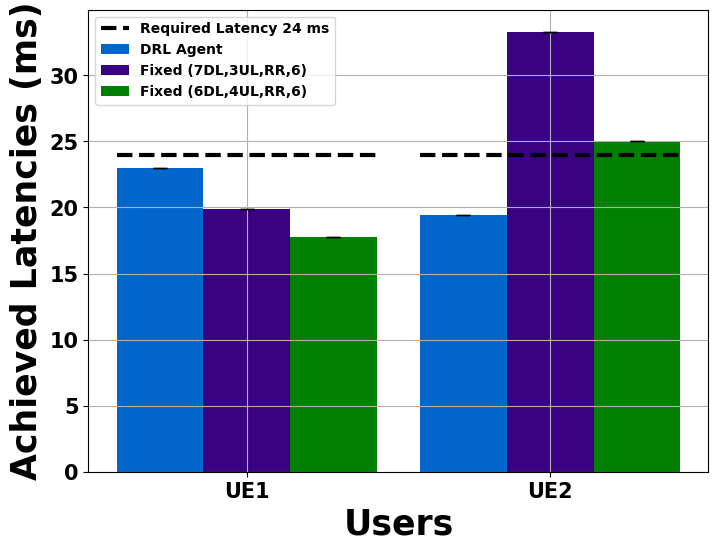

In [39]:
lat_req = [24, 24]
data = {
    "DRL Agent": [23.0, 19.4],
    "Fixed (7DL,3UL,RR,6)": [19.9, 33.3],
    "Fixed (6DL,4UL,RR,6)": [17.8, 25.0],
}
error_data = {
    "DRL Agent": [0, 0],
    "Fixed (7DL,3UL,RR,6)": [0, 0],
    "Fixed (6DL,4UL,RR,6)": [0, 0],
}
font1 = {'family': 'sans-serif', 'size': 25, 'weight': 'heavy'}
bar_width = 0.2
spacing = 0.1
colors = ['#0066CC', '#380282', 'g']
groups = list(data.keys())
num_groups = len(groups)

index = np.arange(len(lat_req)) * (bar_width * num_groups + spacing)

fig, ax = plt.subplots(figsize=(8, 6))
for i, group in enumerate(groups):
    ax.bar(index + i * bar_width, data[group], bar_width, yerr=error_data[group], capsize=5, label=group, color=colors[i])

for i, latency in enumerate(lat_req):
    start_x = index[i] - bar_width / 2
    end_x = index[i] + (num_groups - 0.5) * bar_width
    ax.hlines(latency, start_x, end_x, colors='k', linestyles='--', linewidth=3, label=f'Required Latency {latency} ms')

ax.set_xlabel('Users', color='k', fontdict=font1)
ax.set_ylabel('Achieved Latencies (ms)', color='k', fontdict=font1)
ax.set_title('')
ax.set_xticks(index + (num_groups - 1) * bar_width / 2)
ax.set_xticklabels(['UE1', 'UE2'])  # Change labels to "UE1" and "UE2"
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left', prop={'family': 'sans-serif', 'weight': 'heavy', 'size': 10})
plt.grid()
plt.setp(ax.get_xticklabels(), fontweight='heavy', fontfamily='sans-serif', fontsize=15)
plt.setp(ax.get_yticklabels(), fontweight='heavy', fontfamily='sans-serif', fontsize=15)
path = "plots/2uestatic_req_latencies.pdf"
plt.savefig(path, format='pdf', bbox_inches='tight')
plt.show()
